# Intro to plotting: matplotlib and seaborn
Chris Overton  
2017.01.23  
Adapted most recently from Isaac Laughlin  
Some plots are taken from:
* https://www.oreilly.com/learning/data-visualization-with-seaborn  (requires free Oreilly login)
* Seaborn doc. See the following for a rich gallery of images, each clickable for a drill-down with code: http://seaborn.pydata.org/examples/index.html

# Learning Objectives

1. Name and recognize the two interfaces to matplotlib
2. Be able to use both interfaces to generate charts
3. Understand the connection between matplotlib and seaborne/pandas
4. Make plots with multiple datasets, and figures
5. Know the recommended functional form for writing your own plotting functions

# Why has it taken so long to build a perfect plotting engine?
Intersection of widely varying disciplines, such as:
- Aesthetics
- Human perception
- Changing technology for graphics
- Difficult software engineering to combine simple interface with ability to customize
...

# Appreciating the challenges

A good plotting library should:

* Be easy to use.
* Allow plotting of all kinds of data.
* Support arbitrarily fine-grained control.
* Support a variety of backends to make graphs in various formats.

# Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter
* Plotly
* Bokeh
* Pandas (nice to have one-stop shopping for plots, but this isn't the leading package)
* **Matplotlib**
* **Seaborne**
* ggplot (port of R package of same name)

All of these aim to solve the same problem: allowing you to visualize your data.

# Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used matplotlib. This makes it the de-facto choice for plotting in python.

## How does it work?

In an effort to make easy things easy, and hard things possible, matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|-------|---------|------------|
| plt | minimal, fast interface for plots, annotations | low |
| OO interface w/ pyplot | fine-grained control over figure, axes, etc. | medium |
| pure OO interface | Embed plots in GUI applicatione e.g. | too high |

# plt example

In [1]:
import matplotlib
matplotlib.__version__

'1.5.1'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
#or you can use: %matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [94]:
# Just in case: for now, turn off seaborn (sns), to show basic matplotlib
sns.reset_orig()

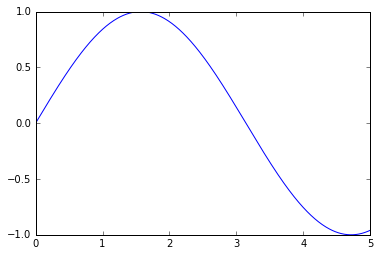

In [97]:
x_data = np.arange(0, 5, .011)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#plt.show() #Not always needed in most recent sw versions!

## CAUTION!! For a plot popup to appear, you need to run ```plt.show()``` if you don't have %matplotlib inline (like in this notebook)

In [96]:
type(plt)

module

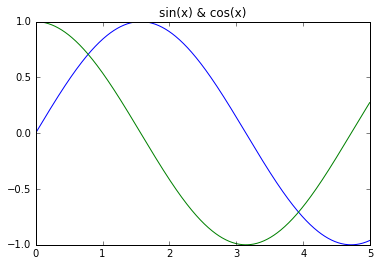

In [47]:
x_data = np.arange(0, 5, .01)
y_data = np.sin(x_data)
plt.plot(x_data, y_data)
#We can actually keep adding state here, and it will be reflected when we finally call show.
plt.plot(x_data, np.cos(x_data))
plt.title("sin(x) & cos(x)")
plt.show()

## Weird

`plt` was imported as a library, but it appears to be keeping some state between the last lines above, behavior that we'd usually associate with objects.

In fact, `plt`, operates in a not-very-pythonic way.

If you thought it was strange that we were working in Python, but there didn't seem to be any objects required to make our image, join the club!

# Behind the curtain

<img src="images/fig_map.png" width=500px>Matplotlib objects</img>



## Common things to do with plots
- Axis sizes, aspect ratio, titles, legends, ...
- Colors and line style

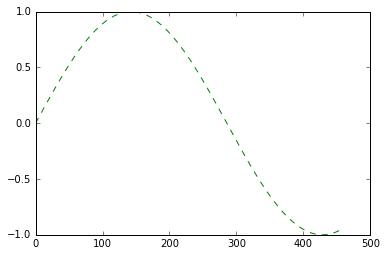

In [104]:
plt.plot(y_data, color='g', linestyle='--')

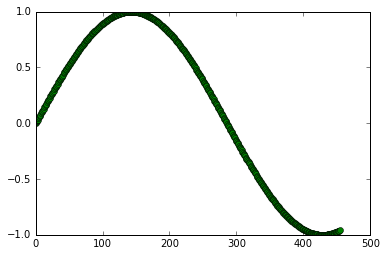

In [106]:
plt.plot(y_data, 'go') #green, thick

## Subplots

In [107]:
plt.figure?

In [108]:
fig = plt.figure()
fig.add_subplot?

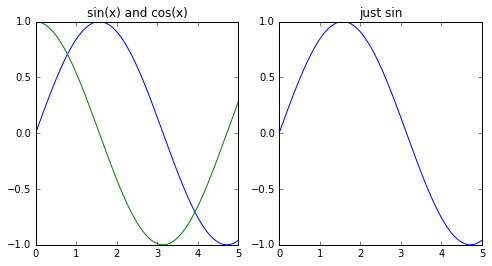

In [109]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121) #nrows, ncols, plotnumber
ax2 = fig.add_subplot(1,2,2)
ax.plot(x_data, y_data)
ax.plot(x_data, np.cos(x_data))
ax.set_title('sin(x) and cos(x)')
ax2.plot(x_data, y_data)
ax2.set_title('just sin')
plt.show()

In this example, the fact that state is maintained is less surprising.

# Mix 'n' Match

Turns out, you can combine `plt`'s function-oriented and object-oriented approaches.

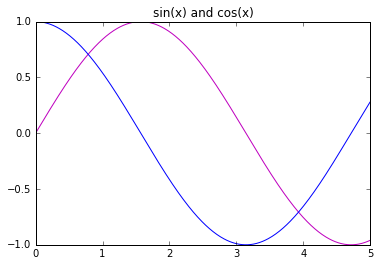

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_data, color='m')
ax.plot(x_data, np.cos(x_data))
plt.title('sin(x) and cos(x)')
plt.show()

# Why should we use the OO approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

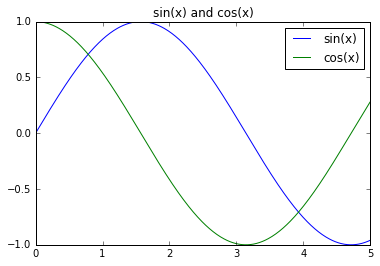

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_data, label='sin(x)')
ax.plot(x_data, np.cos(x_data), label='cos(x)')
plt.title('sin(x) and cos(x)')
ax.legend()

# Multiple plots, using 'subplots'

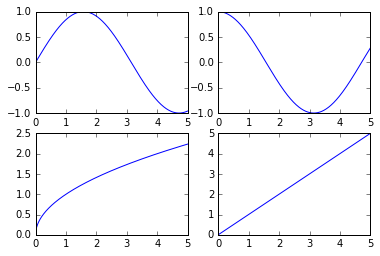

In [110]:
fig, ax_list = plt.subplots(2, 2)
y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x*1]
for subp, y_func in zip(ax_list.flatten(), y_funcs):
    subp.plot(x_data, y_func(x_data))

In [29]:
[x for x in ax_list.flatten()]

In [112]:
type(fig)

matplotlib.figure.Figure

# What about pandas?
It's nice to have 'one-stop shopping' (same library for data frames and plots), but this isn't the leading plotting package

In [33]:
import pandas as pd

In [55]:
df = pd.DataFrame({'x':x_data, 'sinx':np.sin(x_data), 'cosx':np.cos(x_data)})
df = df.set_index('x')
df.head()

,cosx,sinx
x,,
0.000,1.000000,0.000000
0.011,0.999940,0.011000
0.022,0.999758,0.021998
0.033,0.999456,0.032994
0.044,0.999032,0.043986


In [113]:
df.cosx.plot?

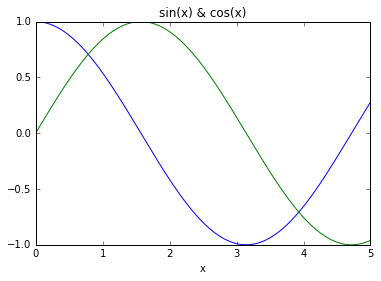

In [116]:
ax = df['cosx'].plot()
ax.set_title('sin(x) & cos(x)')
df.sinx.plot()
#BTW: note the two different ways you can refer to columns of df.
#BTW2: again, note two plot commands just add to the same figure.

Calling the plot method on a pandas series returns a familiar matplotlib axes object.

(-1.5, 1.5)

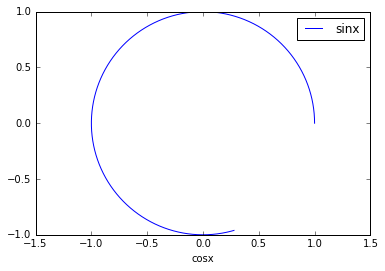

In [119]:
### What will this look like? [Hide image for lecture]
ax = df.plot('cosx', 'sinx')
ax.set_xlim(-1.5, 1.5)

(-1, 1)

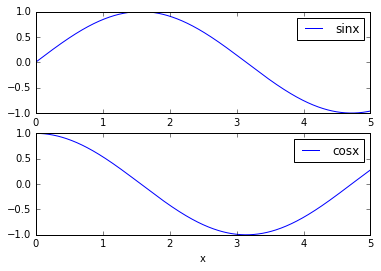

In [59]:
#We can also supply an axes object on which to draw!
fig, ax_list = plt.subplots(2,1)
cols = ['sinx', 'cosx']
for ax, col in zip(ax_list, cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-1, top=1)

In [42]:
def our_own(*args, **kwargs):
    print args, kwargs
our_own(1,2,3, one=1, two=2)

(1, 2, 3) {'two': 2, 'one': 1}


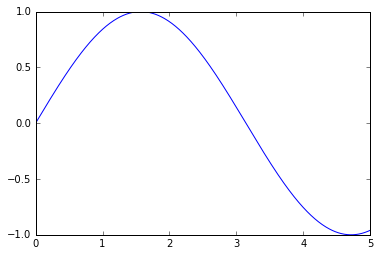

In [60]:
data = (x_data, y_data)
plt.plot(*data)

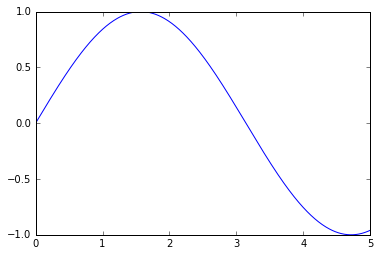

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ret_val = ax.plot(x_data, y_data)
ret_val

# Writing plotting functions

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

In [ ]:
ax = fig.add_subplot(111)
ax.plot(x_data, y_data)
ax

# Example:
Let's write a function that draws some data, and some horizontal
lines representing the 25th and 75th percentile.

We'll call it iqr_plot.

Steps:
- a function for drawing a horizontal line at some point.
- write the iqr_plot function.
- make a 2 by 2 grid of plots using this function.


### First attempt:

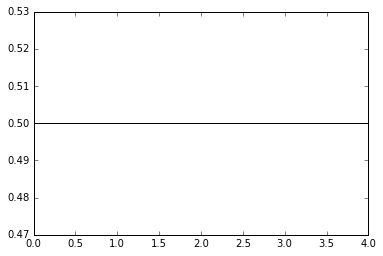

In [11]:
def horizontal_line(ax, x_data, y):
    line = ax.hlines(y, min(x_data), max(x_data))
    return [line]
fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .5)
plt.show()

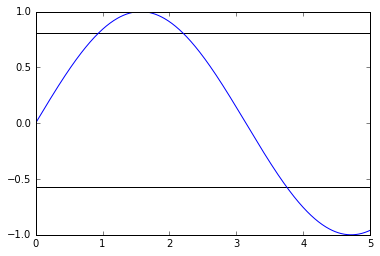

In [62]:
def iqr_plot(ax, x_data, y_data):
    #plot some data
    #plot 25th and 75th percentiles a lines
    p25, p75 = np.percentile(y_data, [25, 75])
    l1 = horizontal_line(ax, x_data, p25)
    l2 = horizontal_line(ax, x_data, p75)
    l3 = ax.plot(x_data, y_data)
    return l1 + l2 + l3
fig = plt.figure()
ax = fig.add_subplot(111)
iqr_plot(ax, x_data, np.sin(x_data))
plt.show()

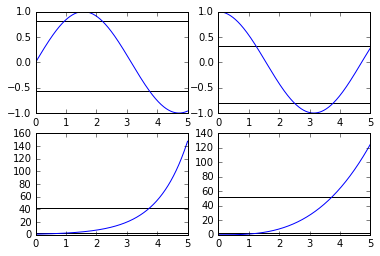

In [63]:
fig, ax_list = plt.subplots(2,2)
Y = [f(x_data) for f in [np.sin, np.cos, np.exp, lambda x: x**3]]
for ax, y_data in zip(ax_list.flatten(), Y):
    iqr_plot(ax, x_data, y_data)

### Now we reimplement to work with more general data and to show the quartiles in different colors

In [64]:
x_data = np.arange(1, 5, .1)
Y = [f(x_data) for f in [np.cos, np.sin, lambda x: x**2, np.log]]
Y

[array([ 0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
         0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
        -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
        -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
        -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
        -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
        -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
        -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237]),
 array([ 0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
         0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
         0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
         0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
         0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
        -0.35078323, -0.44252044, -0.52983614, -0

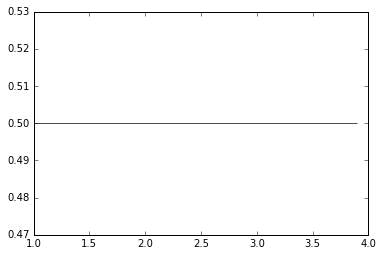

In [15]:
def draw_horizontal(ax, x_data, y, *args, **kwargs):
    line = ax.hlines(y, min(x_data), max(x_data), **kwargs)
    return [line]
fig = plt.figure()
ax = fig.add_subplot(111)
draw_horizontal(ax, x_data, .5, color='m')

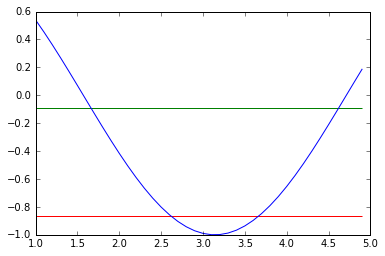

In [65]:
def draw_iqr(ax, x_data, y_data):
    #25th and 75th percentiles
    p25, p75 = np.percentile(y_data, [25, 75])
    h1 = draw_horizontal(ax, x_data, p25)
    h1[0].set_color('r')
    h2 = draw_horizontal(ax, x_data, p75)
    h2[0].set_color('g')
    h3 = ax.plot(x_data, y_data)
    return h1 + h2 + h3
fig = plt.figure()
ax = fig.add_subplot(111)
draw_iqr(ax, x_data, np.cos(x_data))

In [17]:
ax_list.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117108ed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117fb5f50>], dtype=object)

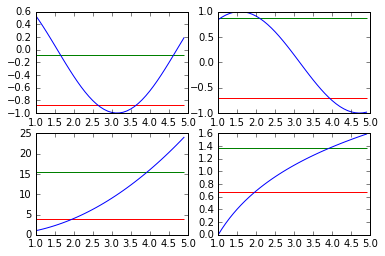

In [66]:
fig, ax_list = plt.subplots(2,2)
for ax, y in zip(ax_list.flatten(), Y):
    draw_iqr(ax, x_data, y)

# Seaborn

A special data visualization library, *built on matplotlib*, for drawing statistical graphics.

In [21]:
import seaborn as sns

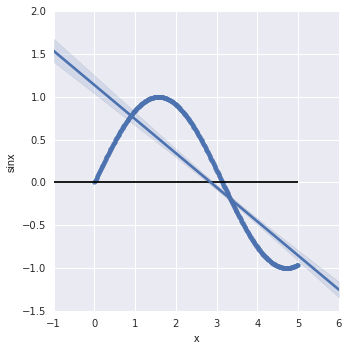

In [139]:
#Seaborn: the lmplot command creates a linear model (pretty fancy for a plotting object?!)
seaborn_grid = sns.lmplot(x="x", y="sinx", data=df.reset_index())
#Combined with matplotlib
seaborn_grid.axes[0,0].hlines(0, -1, 5)

In [124]:
df.head()

,cosx,sinx
x,,
0.000,1.000000,0.000000
0.011,0.999940,0.011000
0.022,0.999758,0.021998
0.033,0.999456,0.032994
0.044,0.999032,0.043986


In [125]:
seaborn_grid.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122be6810>]], dtype=object)

## Compare & contrast aesthetics: seaborn vs matplotlib

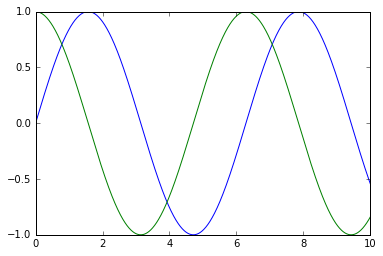

In [135]:
# A traditional matplotlib plot
sns.reset_orig()
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

## Seaborn can 'hijack' plt, which allows it to plug in to implement a prettier version of plt's functionality

In [136]:
import seaborn as sns
sns.set()

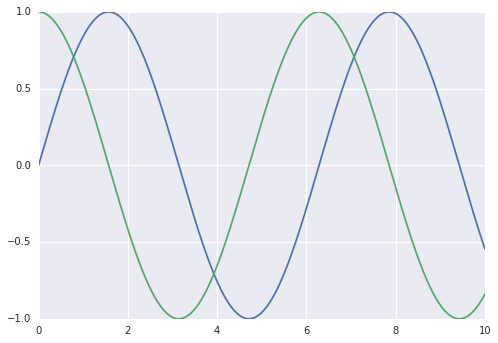

In [137]:
plt.plot(x, np.sin(x), x, np.cos(x));

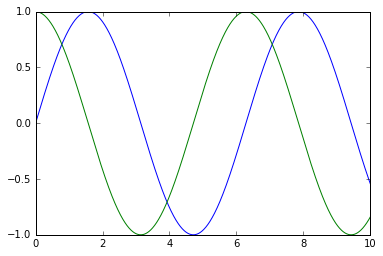

In [71]:
#Oooh, that's pretty! But let's just be explicit when referencing seaborn.
#The next line goes back to matplotlib defaults:
sns.reset_orig()
plt.plot(x, np.sin(x), x, np.cos(x));

In [26]:
#Caution! If this doesn't work, you could try the following to remove more seaborn functionality:
import imp
imp.reload(mpl); imp.reload(plt); imp.reload(sns)
#(But I've seen this misbehave)

<module 'seaborn' from '/Users/christopher.overton/anaconda2/lib/python2.7/site-packages/seaborn/__init__.pyc'>

In [126]:
#For the rest of this presentation, we go back to seaborn
import seaborn as sns
sns.set()

## Caution: when running seaborn with non-inline plotting (like in ipython instead of this notebook), use ```plt.show()``` to show seaborn plots in a popup

# Important plot types
## Histograms

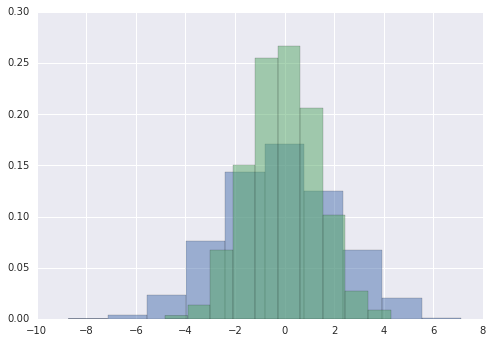

In [127]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

## Kernel density plots: smoothed histograms

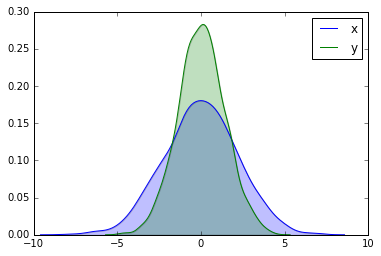

In [75]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

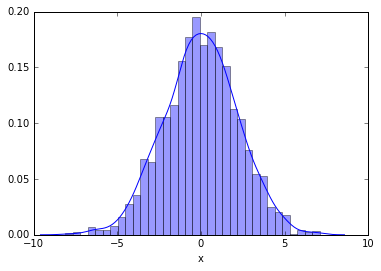

In [77]:
# Both can be shown together:
sns.distplot(data['x']);

With histograms, few bins can hide detail. With many, each point just becomes its own 'needle', which obscures density. The width of kernels is a very similar tradeoff for kde-plots

Kde-plots can also be used in two dimensions to give a better feel for the density distribution  

## Pair plots
These offer a great first look at a data set.  
If there are too many variables, these can be run on targeted subsets of columns.

In [78]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


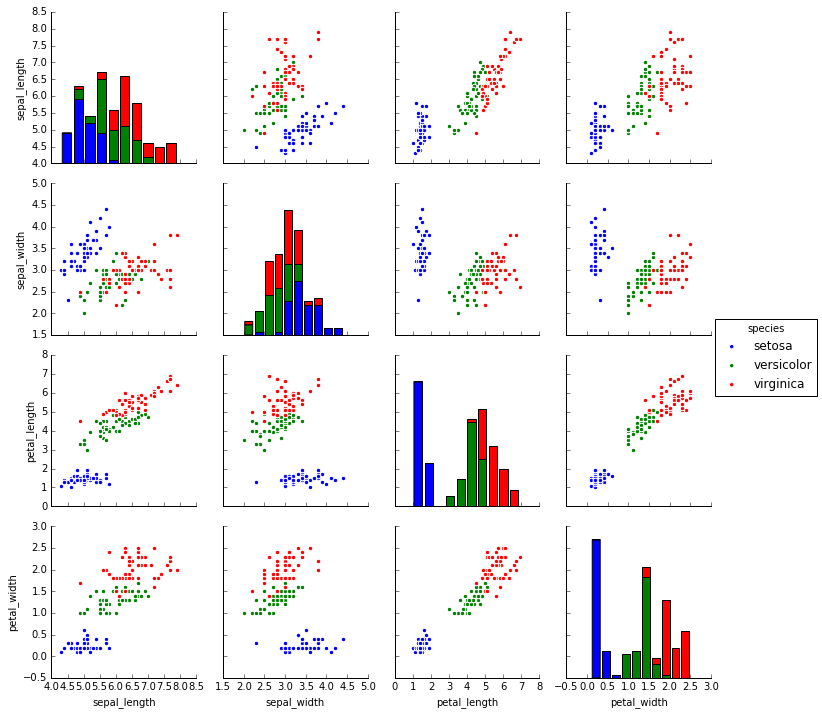

In [79]:
sns.pairplot(iris, hue='species', size=2.5)

## Facetplots show subplots by values of given columns
This allows you to see how things are affected by categorical variables (or dividing lines within continuous variables) 

In [80]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


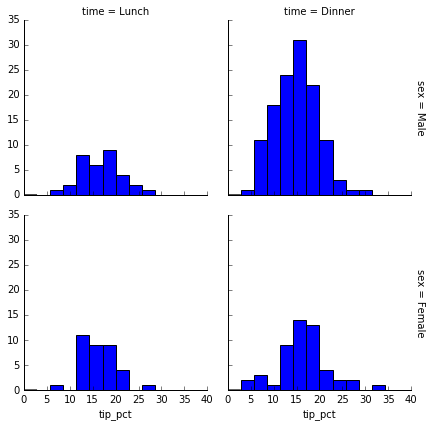

In [81]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# A big challenge: How many dimensions can you visualize at once?

2 + 'several'


## How many would you want to?

Not so many that your audience gets lost

### Joint distributions
kind='hex' shows a density function with two input dimensions

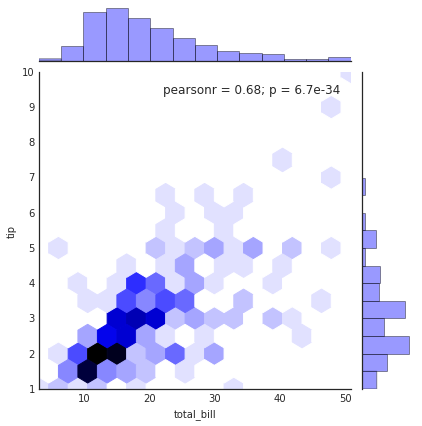

In [83]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

### By specifying kind='reg' instead, get a more informative linear regression
Benefit: understanding model behavior in addition to data!

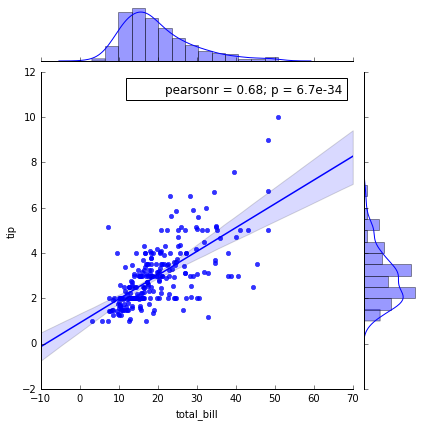

In [85]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

For a representative set of examples, see:
http://seaborn.pydata.org/examples/index.html

## Violin plots
A pretty way to show densities as they depend on another variable (or even paired densities on a third variable.)  
<br>
See all that is going on in the next graph:

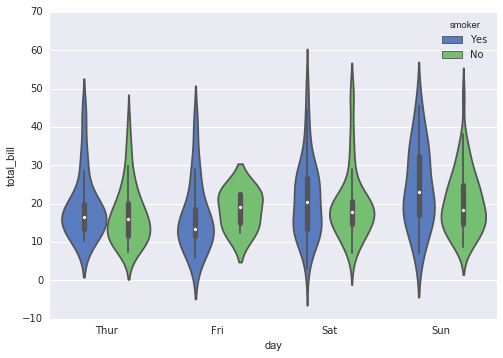

In [131]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted")

Now, here's the same information except scrunched together in a way that highlights the contrast by smoker  
(Note the 'split' argument):

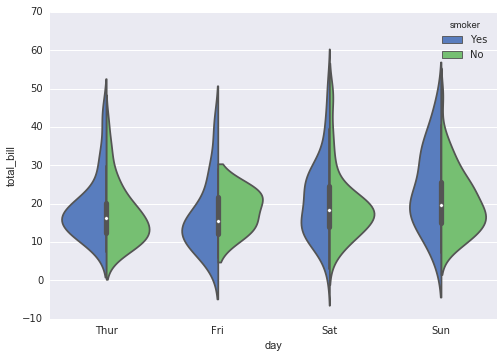

In [132]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)

## Other techniques for effective presentation of more data relationships
- Movies instead of pictures: python 'Interact' command
- '3d' graphics
- Interactivity, e.g. using JavaScript

We will have another session on data visualization to show inspiring examples

# Key takeways on plotting
- Being good at **one** plotting tool is a vital DS skill:
    - For learning from your data
    - For telling persuasive stories to others
- Seaborn is a modern, relatively seamless plugin to matplotlib, so why not standardize on this (at least for now...)?
- Plots are mostly 2d, with some 3d. But you can cram in up to several additional dimensions if you really need to
- **In order to get fluent with this, you really do need to experiment with the different plot types and their objects and methods!**